# Q1: สรุปข้อมูล (Data Summary)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

In [2]:
df = pd.read_csv("titanic_data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
sorted_df_ascending = df.sort_values(by='Age', ascending=True)
sorted_df_ascending
sorted_df_descending = df.sort_values(by='Age', ascending=False)
sorted_df_descending

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


### ประเภทของข้อมูล


In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Q2: สถิติเชิงพรรณนา (Descriptive Statistics)

## คํานวณและอธิบายค่าต่างๆสําหรับคอลัมน์ที่เป็นตัวเลข

### ค่าเฉลี่ย (Mean)

In [5]:
df.mean(numeric_only=True)

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

จะได้ค่าเฉลี่ย(Mean)ของค่าต่างๆออกมาดังข้างบนคือ  
* PassengerId  =  446.000000  
* Survived    =    0.383838  
* Pclass     =      2.308642  
* Age       =      29.699118  
* SibSp     =       0.523008  
* Parch     =       0.381594  
* Fare      =      32.204208  

### ค่ามัธยฐาน (Median)

In [6]:
num_columns = ['PassengerId', 'Survived','Pclass','Age','SibSp','Parch','Fare']
num_df = df[num_columns]
num_df.median()

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

จะได้ค่ามัธยฐาน(Median)ของค่าต่างๆออกมาดังข้างบนคือ  
* PassengerId  =  446.0000
* Survived    =     0.0000
* Pclass     =      3.0000
* Age       =      28.0000
* SibSp     =       0.0000
* Parch     =       0.0000
* Fare      =      14.4542  
พบว่าเกือบทุกค่าใกล้เคียงกับค่าเฉลี่ย ยกเว้นค่า Fare หรือค่าโดยสารที่ห่างจากค่าเฉลี่ยมาก

### ค่าฐานนิยม (Mode)

In [7]:
num_df.mode().loc[0,]

PassengerId     1.00
Survived        0.00
Pclass          3.00
Age            24.00
SibSp           0.00
Parch           0.00
Fare            8.05
Name: 0, dtype: float64

จะได้ค่าฐานนิยม(Mode)ของค่าต่างๆออกมาดังข้างบน  
โดยค่ามัธยฐานหลายตัวมีค่าเป็น 0  
ส่วนของ passengerid ไม่มีค่ามัธยฐานเนื่องจากเป็นค่าที่แตกต่างกันทุกค่า (primary key)    


### ค่าส่วนเบี่ยงเบนมาตรฐาน (Standard deviation)

In [8]:
num_df.std()

PassengerId    257.353842
Survived         0.486592
Pclass           0.836071
Age             14.526497
SibSp            1.102743
Parch            0.806057
Fare            49.693429
dtype: float64

ในส่วนของค่าเบี่ยงเบนมาตรฐาน(Standard deviation)มีอยู่ 3 ค่าที่มีค่าเบี่ยงเบนมาก
1. PassengerId เนื่องจากมีค่าแตกต่างกันทุกตัว
2. Age เนื่องจากอายุมีช่วงที่กว้างมาก
3. Fare เนื่องจากค่าโดยสารมีตั้งแต่ราคาถูกถึงแพง



### ค่าช่วงควอไทล์ (Interquartile range)

In [9]:
num_df.quantile(0.75) - num_df.quantile(0.25)

PassengerId    445.0000
Survived         1.0000
Pclass           1.0000
Age             17.8750
SibSp            1.0000
Parch            0.0000
Fare            23.0896
dtype: float64

In [10]:
num_df.quantile(0.75)

PassengerId    668.5
Survived         1.0
Pclass           3.0
Age             38.0
SibSp            1.0
Parch            0.0
Fare            31.0
Name: 0.75, dtype: float64

In [11]:
num_df.quantile(0.25)

PassengerId    223.5000
Survived         0.0000
Pclass           2.0000
Age             20.1250
SibSp            0.0000
Parch            0.0000
Fare             7.9104
Name: 0.25, dtype: float64

ในส่วนของค่าช่วงควอไทล์(Interquartile range)
เป็นตัวบอกความห่างของช่วงระหว่าง Q3-Q1 เพื่อดูความกระจายของข้อมูล จะเห็นได้ว่าได้ค่าคล้ายกับ SD ที่เป็นตัวบ่งบอกความกระจายของข้อมูลเช่นกัน

## คํานวณค่าส่วนเบี่ยงเบน (Skewness) สําหรับคอลัมน์ที่เป็นตัวเลข

In [12]:
num_df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

ค่าส่วนเบี่ยงเบน(Skewness) บ่งบอกถึงการกระจายตัวของกราฟว่าเบ้ไปในทิศทางใด

 โดยที่ค่าส่วนเบี่ยงเบนเป็นบวกหมายถึงกราฟเบ้ขวา หมายถึงข้อมูลอยู่ฝั่งซ้ายของกราฟมากกว่าฝั่งขวา  
 ส่วนค่าส่วนเบี่ยงเบนเป็นลบหมายถึงกราฟเบ้ซ้ายหมายถึงข้อมูลอยู่ฝั่งขวาของกราฟมากกว่าฝั่งซ้าย  
แสดงให้เห็นว่าค่า SibSp Parch และ Fare มีค่าส่วนเบี่ยงเบนมาก

## สรุปการกระจายตัวของแต่ละคอลัมน์ที่เป็นประเภทเชิงพรรณนา (Categorical columns)

<Axes: xlabel='Name', ylabel='count'>

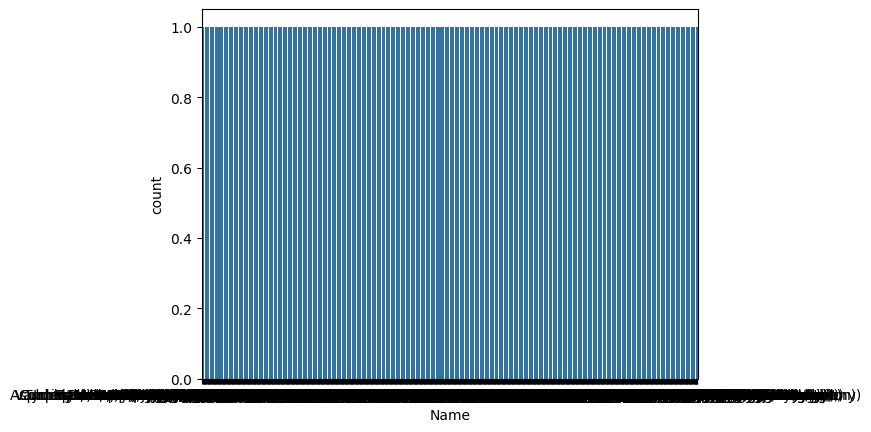

In [13]:
sns.countplot(data = df, x='Name')

<Axes: xlabel='Sex', ylabel='count'>

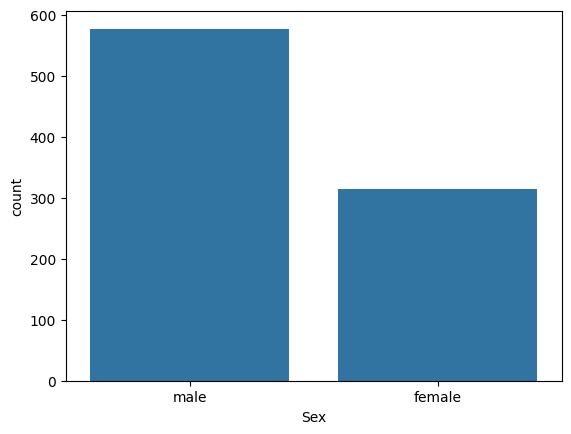

In [14]:
sns.countplot(data = df, x='Sex')

<Axes: xlabel='Ticket', ylabel='count'>

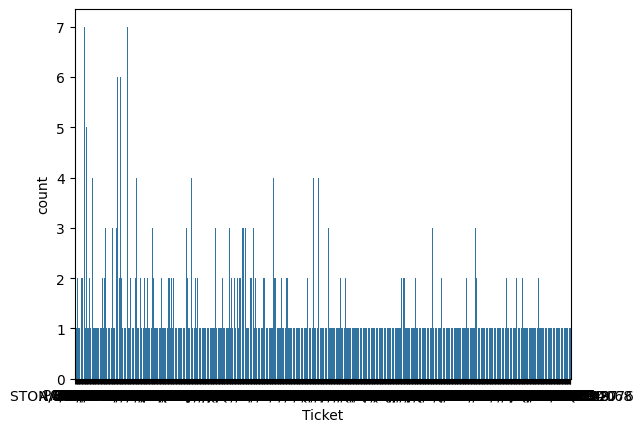

In [15]:
sns.countplot(data = df, x='Ticket')

<Axes: xlabel='Cabin', ylabel='count'>

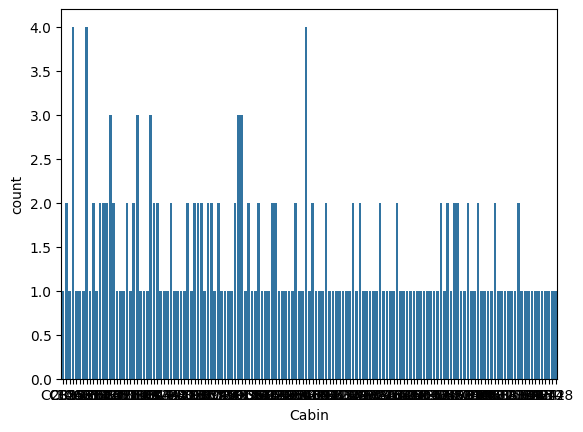

In [16]:
sns.countplot(data = df, x='Cabin')

<Axes: xlabel='Embarked', ylabel='count'>

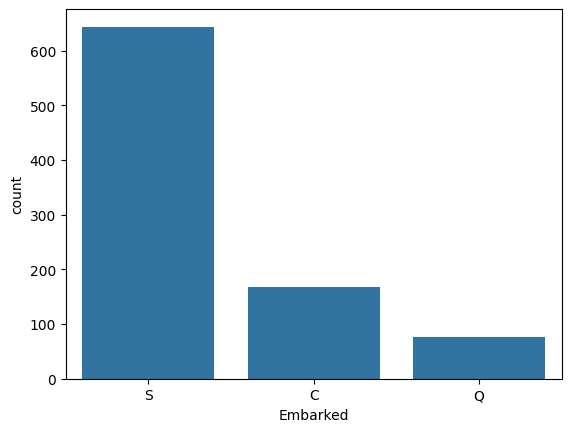

In [17]:
sns.countplot(data = df, x='Embarked')

จะเห็นได้ว่ามีแค่ตาราง sex กับ embarked ที่สามารถ plot ให้เห็นภาพได้ชัดเจนว่ามีการแบ่งเพศเป็น 2 เพศ และแบ่ง embarked หรือจุดที่ผู้โดยสารขึ้นเรือได้ 3 ที่

# Q3: การตรวจหาข้อมูลที่ขาดหาย และผิดปกติ (Missing Data, Outliers)

## ตรวจสอบว่ามีค่าที่ขาดหาย (missing values) ในชุดข้อมูลหรือไม่ คอลัมน์ใดบ้างที่มีค่าที่ขาดหาย

In [18]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

เห็นได้ว่ามี 3 คอลัมน์ คือ Age, Cabin และ Embarked ที่ข้อมูลขาดหายไป

## แสดงภาพข้อมูลที่ขาดหายโดยใช้ heatmap

<Axes: >

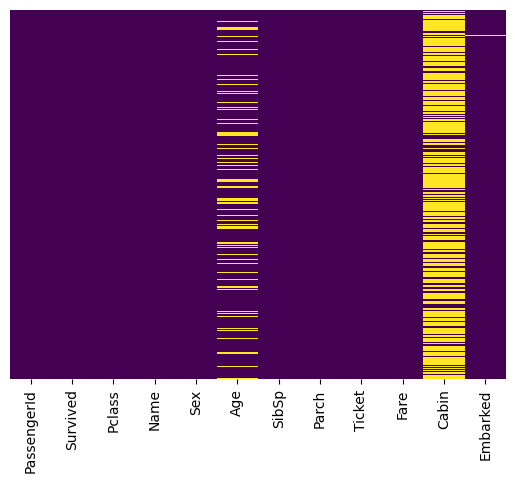

In [19]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

จาก heatmap แสดงให้เห็นว่าข้อมูล Age มีข้อมูลหายไปส่วนหนึ่ง ส่วนข้อมูล Cabin มีข้อมูลหายไปเป็นจำนวนมาก และ Emabrked มีข้อมูลหายไปเพียงแค่ 2 ตัว

## ยกตัวอย่างสองถึงสามตัวแปรที่มีค่าผิดปกติ (outliers)

<Axes: xlabel='Fare', ylabel='Count'>

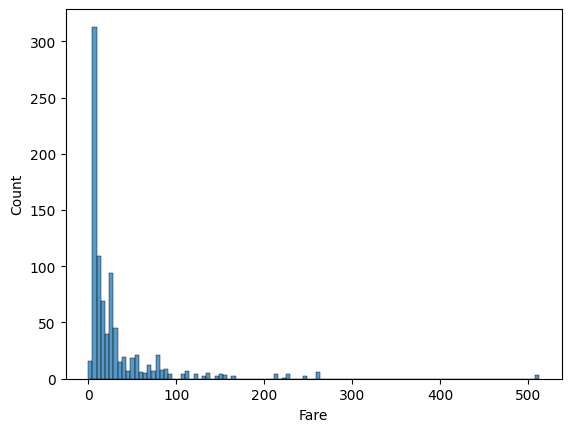

In [20]:
sns.histplot(data = df, x='Fare')

จาก Histogram ของ Fare จะเห็นได้ชัดว่ามี outlier อยู่หนึ่งตัวที่ค่าโดยสารมากกว่า 500$

<Axes: xlabel='SibSp', ylabel='Count'>

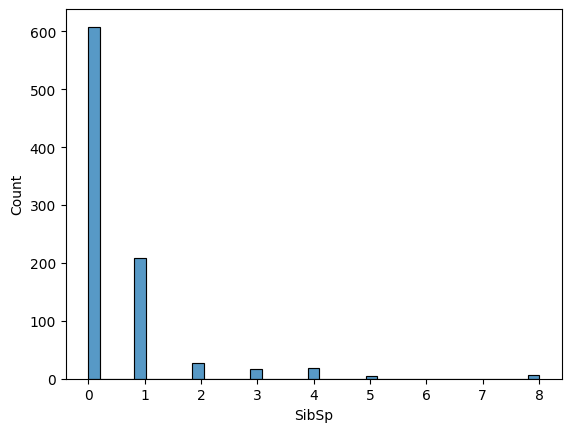

In [21]:
sns.histplot(data = df, x='SibSp')

จะเห็นได้ว่ามีค่า SibSp หรือจำนวนพี่น้อง/คู่สมรสที่ขึ้นเรือมาด้วยอยู่หนึ่งตัวที่มีค่าสูงกว่าค่าเฉลี่ยอื่นๆ คือที่ SibSp = 8

# Q4: การแสดงข้อมูลด้วยกราฟ (Data Visualization)

## สร้างฮิสโตแกรม (Histograms) สําหรับคอลัมน์อายุ (Age) และค่าโดยสาร (Fare)

Text(0, 0.5, 'Frequency')

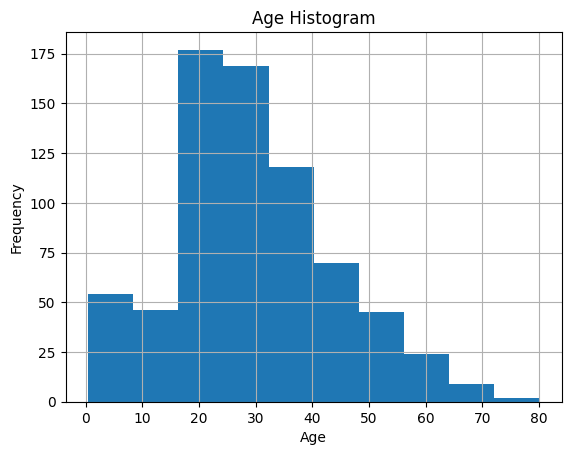

In [22]:
selected_var = 'Age'
# df.hist(column=selected_var)
df[selected_var].hist()
plt.title(selected_var + ' Histogram')
plt.xlabel(selected_var)
plt.ylabel('Frequency')

การกระจายของอายุจะเห็นได้ว่าอายุช่วง 20-30 มีค่าเยอะที่สุด จากนั้นค่อยๆลดหลั่นลงมาจนถึงอายุ 80 และช่วงอายุ 0-20 มีค่าไม่มากนักเนื่องจากยังเป็นเด็กอยู่จึงไม่สามารถเดินทางคนเดียวได้

Text(0, 0.5, 'Frequency')

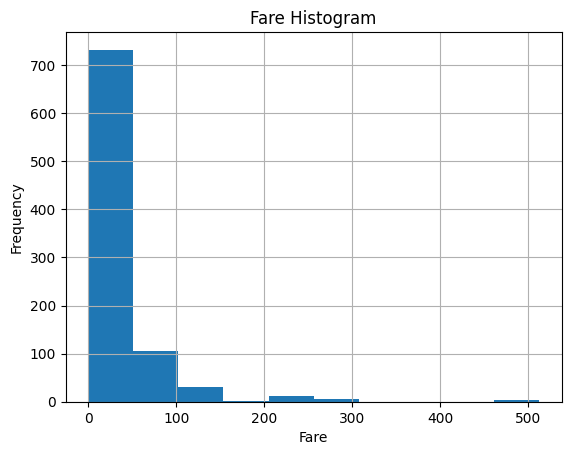

In [23]:
selected_var = 'Fare'
# df.hist(column=selected_var)
df[selected_var].hist()
plt.title(selected_var + ' Histogram')
plt.xlabel(selected_var)
plt.ylabel('Frequency')

ในส่วนของค่าโดยสารนั้นส่วนใหญ่นั้นอยู่ในช่วง 0-50 และเกือบทั้งหมดอยู่ในช่วง 0-100 ส่วนน้อยนั้นไม่เกิน 300 และมีค่าโดยสารที่มีราคา 800 อยู่ 1 ตัวแสดงให้เห็นว่าค่าโดยสารส่วนมากมีราคาถูก คือผู้โดยสารชั้นทั่วไปที่มีจำนวนมากซื้อตั๋วราคาไม่แพงมาก และส่วนน้อยที่มีราคาแพงขึ้นมาหน่อย คือผู้โดยสารชั้นสูงขึ้นมาที่มีจำนวนผู้โดยสารน้อยลง

## สร้างกล่องกราฟ (box plots) สําหรับคอลัมน์อายุ (Age), ค่าโดยสาร (Fare), และจํานวนพี่น้อง/คู่สมรส (SibSp)

<Axes: >

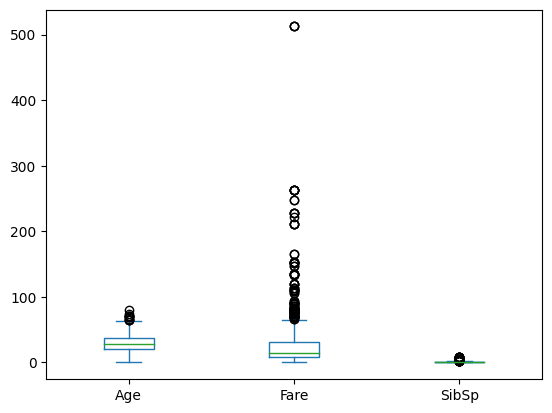

In [24]:
df[["Age", "Fare", "SibSp"]].plot.box()

สำหรับ Boxplot นั้นจะมีการ plot outlier มาให้ด้วยทำให้เห็นภาพว่าข้อมูลใดที่มีการกระจายแบบผิดปกติ

<Axes: xlabel='Age'>

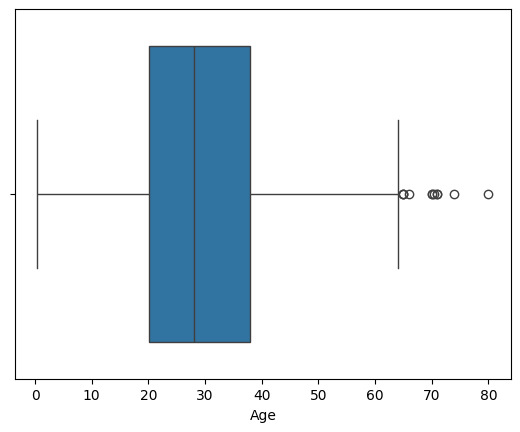

In [25]:
sns.boxplot(x='Age', data=df)

ในส่วนของอายุนั้นมีค่าเฉลี่ยอยู่ที่ประมาณ 29 ปี ส่วนอายุที่เกิน 65 ปีกลายเป็น outlier และอายุส่วนใหญ่กระจายตัวอยู่ระหว่าง 20-40 ปี

<Axes: xlabel='Fare'>

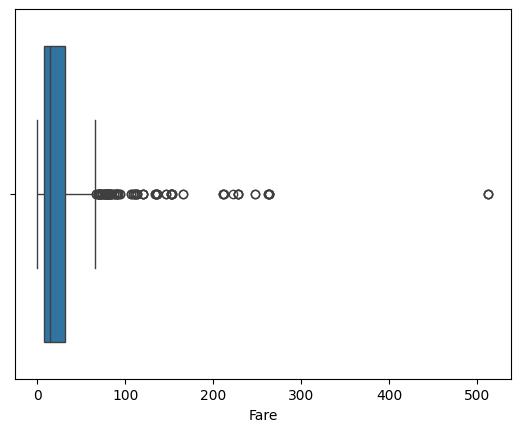

In [26]:
sns.boxplot(x='Fare', data=df)

ส่วนของค่าโดยสารนั้นมีค่าเฉลี่ยอยู่ที่ประมาณ 30\$ มี outlier จำนวนมาก ตั้งแต่เกือบเกิน 100\$ ขึ้นไปนับว่าเป็น outlier และค่าโดยสารส่วนใหญ่กระจายตัวอยู่ระหว่าง 8-31 \$

<Axes: xlabel='SibSp'>

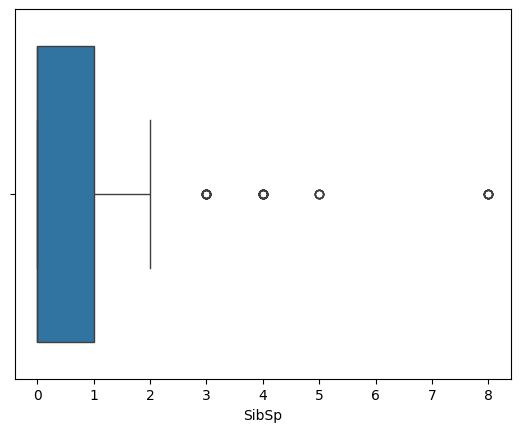

In [27]:
sns.boxplot(x='SibSp', data=df)

ส่วนของจํานวนพี่น้อง/คู่สมรส มีค่าเฉลี่ยอยู่ที่ 0 คน และจำนวนที่เกิน 3 ถือเป็น outlier ทั้งหมด และจํานวนพี่น้อง/คู่สมรสส่วนใหญ่กระจายตัวอยู่ระหว่าง 0-1 คน

# Q5: การสํารวจความสัมพันธ์ระหว่างคอลัมน์ตัวเลข (Exploring Relationships between Numerical Columns)

## คํานวณค่าสัมประสิทธิ์สหสัมพันธ์แบบเพียร์สัน (Pearson correlation coefficient) ระหว่างอายุ (Age) และค่าโดยสาร (Fare)

In [28]:
pearson_correlation = df['Age'].corr(df['Fare'])
pearson_correlation

0.0960666917690389

สำหรับค่าสัมประสิทธิ์สหสัมพันธ์แบบเพียร์สัน ถ้ามีค่าระหว่าง 0-1 ถึง แสดงว่ามีแนวโน้มในการแปรผันตรงกัน แต่ถ้าอยูระหว่าง -1 ถึง 0 จะมีแนวโน้มในการแปรผกผันกัน และถ้าเป็น 0 จะแสดงว่าไม่มีความเกี่ยวข้องกัน  
โดยจากค่าที่ได้คือประมาณ 0.1 แสดงว่าระหว่างค่า Age กับ Fare แทบจะไม่มีความเกี่ยวข้องกันเลย

## สร้างกราฟกระจาย (scatter plot) เพื่อแสดงความสัมพันธ์ระหว่างอายุ (Age) และค่าโดยสาร (Fare)

<Axes: xlabel='Age', ylabel='Fare'>

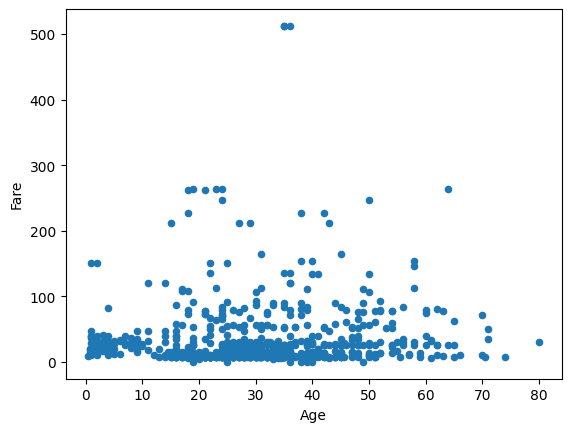

In [29]:
df.plot.scatter(x="Age", y="Fare")

สังเกตได้ว่า แม้อายุของผู้โดยสารจะมากขึ้น ก็ไม่มีแนวโน้มที่ค่าโดยสารจะเพิ่มขึ้นตามด้วย และเกือบทั้งหมดที่อายุต่ำกว่า 20 ปีซื้อตั๋วราคาถูกกว่า 100\$

## สร้าง pairplot สําหรับอายุ (Age), ค่าโดยสาร (Fare), และจํานวนพี่น้อง/คู่สมรส (SibSp)

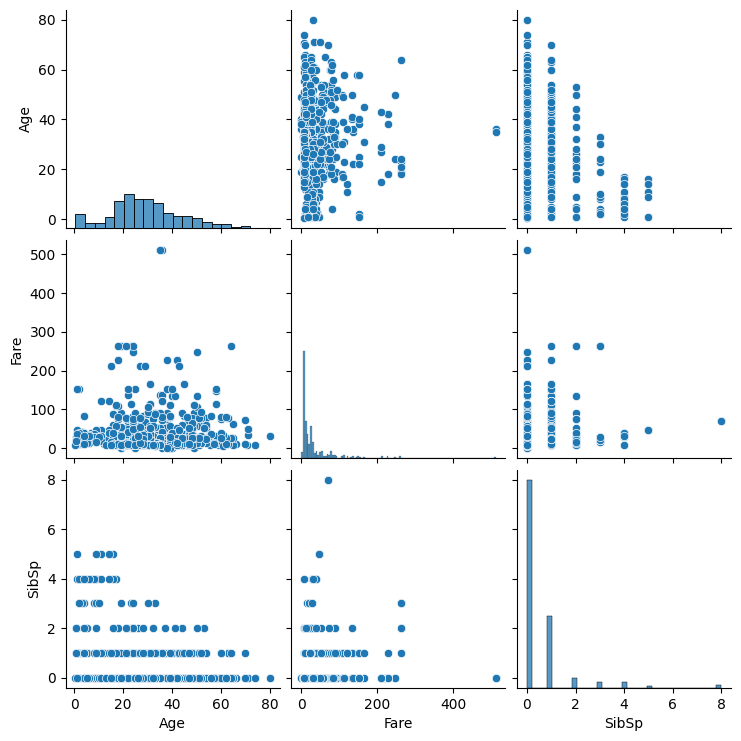

In [30]:
pairplot_columns = df[['Age', 'Fare', 'SibSp']]
sns.pairplot(pairplot_columns)

จากกราฟระหว่าง Age กับ SibSp จะเห็นได้ว่ากลุ่มคนที่มีอายุน้อยกว่า 20 เท่านั้นที่จะมีจํานวนพี่น้อง/คู่สมรสมากกว่า 4 คน

# Q6: การสํารวจความสัมพันธ์ระหว่างคอลัมน์เชิงพรรณนา (Exploring Relationships between Categorical Columns)

## สร้างตารางแจกแจง (contingency table) เพื่อแสดงการกระจายตัวของการรอดชีวิต (Survival) ในแต่ละประเภทชั้นโดยสาร (Pclass)

<Axes: xlabel='Survived', ylabel='count'>

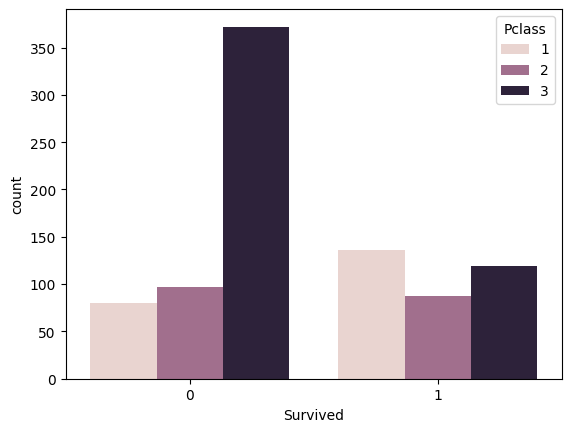

In [31]:
sns.countplot(data=df, x="Survived", hue="Pclass")

จากที่กราฟเปรียบเทียบจะเห็นได้ชัดเจนว่า ผู้โดยสารชั้น 3 นั้นมีจำนวนการเสียชีวิตมากกว่าชั้นอื่นๆ อาจเกิดจากการที่มีผู้โดยสารชั้น 3 มากกว่าชั้นอื่นๆ แต่ดูอัตราส่วนการรอด/ไม่รอดของผู้โดยสารชั้นอื่นๆแล้ว สรุปได้ว่าผู้โดยสารชั้น 3 มีอัตรารอดต่ำกว่าผู้โดยสารชั้นอื่นๆ

In [32]:
contingency_table = pd.crosstab(df['Survived'], df['Pclass'])

observed = contingency_table.values

# คำนวนค่า expected value
row_totals = contingency_table.sum(axis=1).values
column_totals = contingency_table.sum(axis=0).values
total_population = contingency_table.values.sum()

expected = []
for i in range(len(row_totals)):
    expected_row = []
    for j in range(len(column_totals)):
        expected_value = (row_totals[i] * column_totals[j]) / total_population
        expected_row.append(expected_value)
    expected.append(expected_row)

expected = np.array(expected)

# Calculate Chi-Square statistic
chi2 = ((observed - expected) ** 2 / expected).sum()

# Degrees of Freedom
degrees_of_freedom = (len(row_totals) - 1) * (len(column_totals) - 1)
print(f"Chi-Square Statistic: {chi2}")
print(f"Degrees of Freedom: {degrees_of_freedom}")

Chi-Square Statistic: 102.88898875696056
Degrees of Freedom: 2


จากค่าที่ได้จะเห็นได้ว่าค่า Chi-Square มีค่าสูงมาก หมายความว่าค่า Survived กับ Pclass มีความสัมพันธ์กันอย่างมาก